In [17]:
import veloagents
import anndata
import torch
import matplotlib.pyplot as plt
import numpy as np
import scvelo as scv
import scanpy as sc

## Load AnnData

In [2]:
adata = anndata.read_h5ad('/Users/brentyoon/Documents/COMP402/code/dataset/mydata.h5ad')
genes_to_keep = ~adata.var_names.str.startswith("ENSG")
adata = adata[:, genes_to_keep]

In [3]:
sc.pp.neighbors(adata, n_neighbors=30)

max_neighbors = 29
neighbor_indices = []

mat = adata.obsp['connectivities'].todense()

for row in mat:
    neighbors = np.nonzero(row)[1]
    padded = np.full(max_neighbors, -1, dtype=int)  # -1 indicates no neighbor
    padded[:min(len(neighbors), max_neighbors)] = neighbors[:max_neighbors]
    neighbor_indices.append(padded)

neighbor_indices = np.array(neighbor_indices, dtype=int)
adata.uns['neighbors']['indices'] = neighbor_indices

## Perturbation parameters

In [4]:
# for option 1
cluster_edges_opt1 = [('cancer1','stromal cells'),('cancer2','stromal cells'),('cancer2','fibroblasts')]

In [ ]:
# for option 2
cluster_edges_opt2 = ['cancer1','stromal cells','cancer2','fibroblasts']

In [5]:
cluster_name = 'clusters'
my_pert_param = 'alpha'

## Velocity projection before perturbation

  0%|          | 0/1656 [00:00<?, ?cells/s]

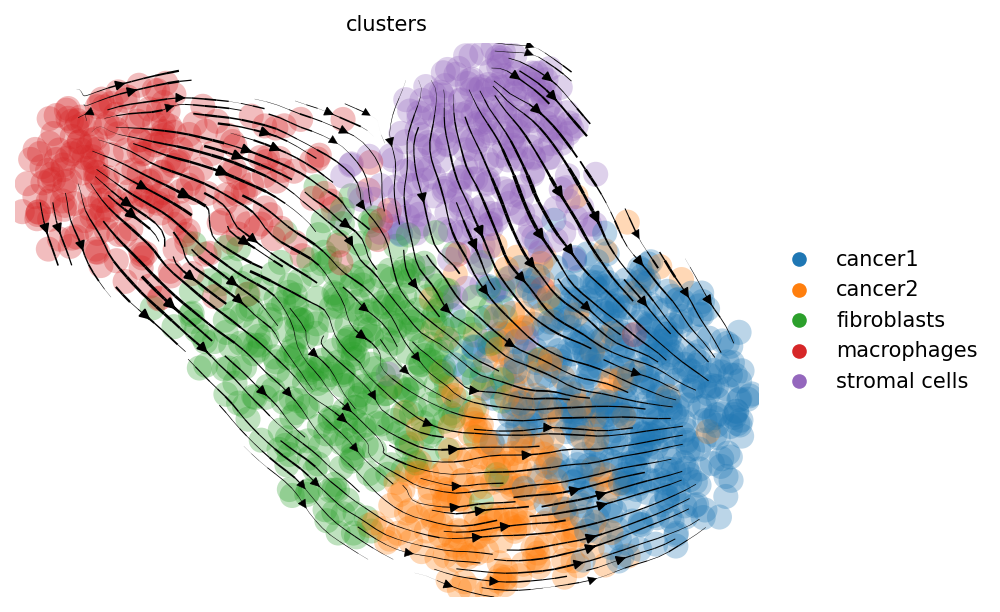

In [6]:
scv.tl.velocity_graph(adata, vkey='velocity')
scv.pl.velocity_embedding_stream(adata,
                                 legend_loc="right margin", 
                                 vkey='velocity', 
                                 basis='umap', 
                                 color=[cluster_name],
                                 dpi=150)

## Calculating gene score for perturbation

In [7]:
scores = veloagent.perturbation_score(adata, cluster_name, cluster_edges_opt1, vel_key='velocity_u', metric_option=1, pert_param=my_pert_param)

Processing gene 0/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 100/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 200/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 300/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 400/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 500/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 600/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 700/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 800/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 900/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

Processing gene 1000/1011


  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

  0%|          | 0/1656 [00:00<?, ?cells/s]

In [8]:
scores.sort_values(by='score')

,score
index,
TRABD2A,-0.515495
SYN1,-0.180532
CASC11,-0.136507
PARP10,-0.105570
DLGAP4-AS1,-0.053916
...,...
GLRX,0.348161
ERBB2,0.351141
LIPA,0.416783


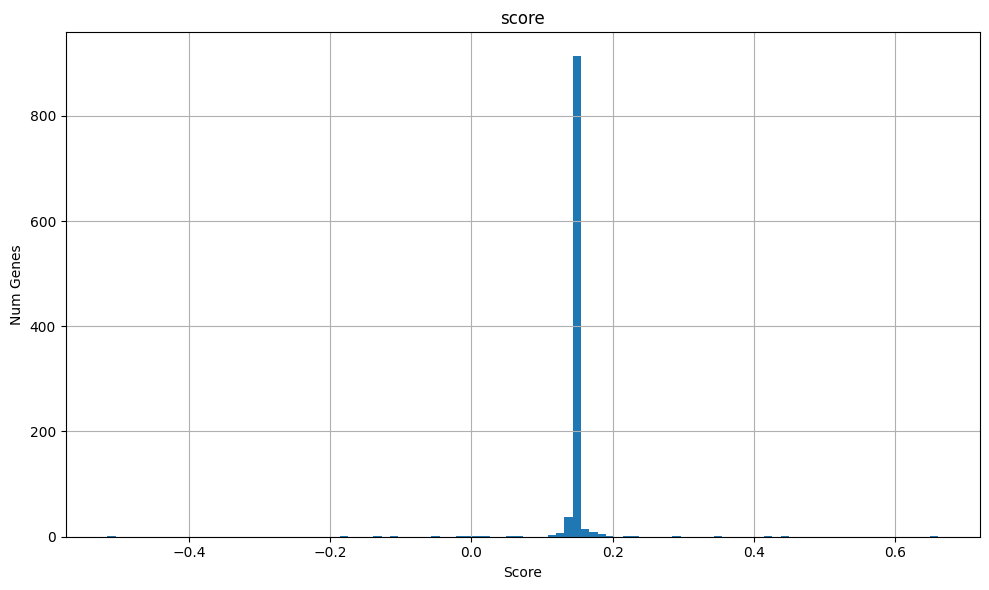

In [9]:
# plot histogram of scores
scores.hist(bins=100, figsize=(10, 6))
plt.xlabel('Score')
plt.ylabel('Num Genes')
plt.tight_layout()
plt.show()

In [10]:
# if you want to save the results
scores.to_csv('perturbations.csv')

## Perturbation

In [11]:
# Genes to perturb
gene_list = [
    'CARD14',
    'LIPA',
    'ERBB2',
    'GLRX',
    'HCG20',
    'CRLF1',
    'BOP1',
    'ZNF586',
    'PSMB9',
    'SHC4',
    'IK',
    'SARM1',
    'UTP23',
    'HIF1AN',
    'FKRP',
    'CLTA',
    'EIF2D',
    'NCOA6',
    'SRRM2',
    'RRP7BP',
    'DDHD2',
    'LRRC59',
    'SKIC8',
    'PHYKPL',
    'SGPL1',
]

In [12]:
bdata = veloagent.perturb(adata, gene_list, my_pert_param, dt=0.5)

## Velocity projection after perturbation

  0%|          | 0/1656 [00:00<?, ?cells/s]

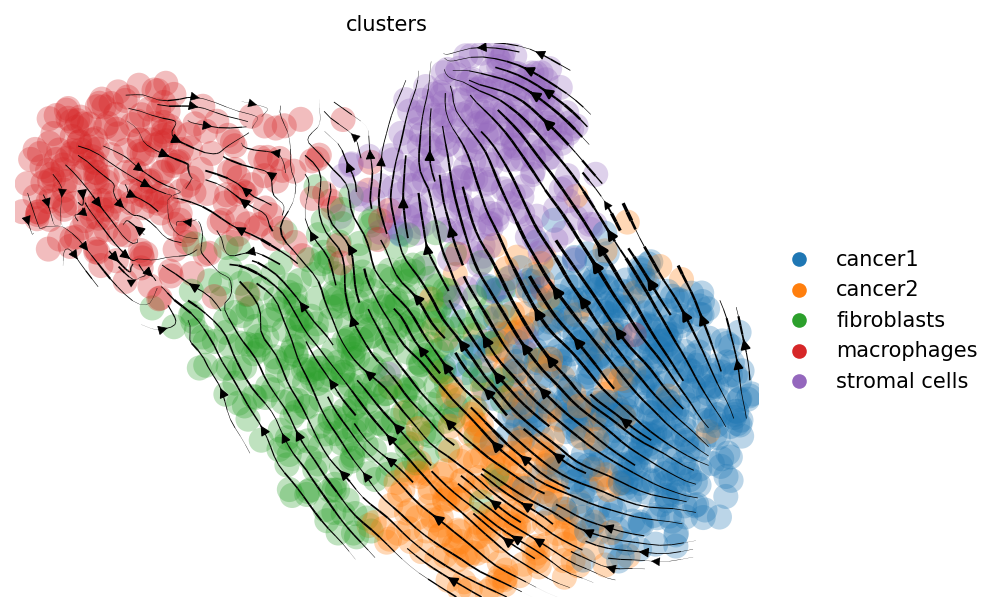

In [13]:
# RNA velocity after perturbation
scv.tl.velocity_graph(bdata, vkey='velocity')
scv.pl.velocity_embedding_stream(bdata,
                                 legend_loc="right margin", 
                                 vkey='velocity', 
                                 basis='umap', 
                                 color=[cluster_name],
                                 dpi=150)

In [19]:
veloagents.perturb_score_plt(scores, gene_list)

ValueError: Length of values (25) does not match length of index (1011)